## EDA and Variable Manipulation

In [7]:
#Train/Validate/Test split
train = data.sample(frac = 0.6, random_state = 460405708) #TRAINING DATA

validate_test = data[data.index.isin(train.index)==False].copy()

validate = validate_test.sample(frac = 0.5, random_state = 460405708) #VALIDATION SET

test = validate_test[validate_test.index.isin(validate.index)==False].copy() #TEST SET

In [8]:
#Define various functions
def hist_box(i):
    fig,ax=plt.subplots(1,2,figsize=(12,5))
    sns.distplot(train[i],ax=ax[0],hist_kws={'alpha': 0.9, 'edgecolor':'black', 'color': sns.color_palette('Blues')[-1]}, 
                 kde_kws={'color': 'black', 'alpha': 0.7})
    ax[0].set(ylabel='Frequency', title='Histogram for {}'.format(i), xlabel=i)
    sns.boxplot(train[i],orient='v',ax=ax[1])
    ax[1].set(title='Box plot for {}'.format(i), ylabel=i)
    return fig, ax

def regplt(i):
    fig,ax=plt.subplots(1,1,figsize=(12,5))
    sns.regplot(train[i], train[response], color=sns.color_palette('Blues')[-1], ci=None, logistic=True, y_jitter=0.05, 
            scatter_kws={'s': 25, 'color': sns.color_palette('Blues')[-1], 'alpha': .5})
    sns.despine()
    return fig,ax

def count(cata_var):
    count = {}
    for i in cata_var.unique():
        count[i] = 0 
        for j in cata_var:
            if j == i:
                count[i] += 1
    return count

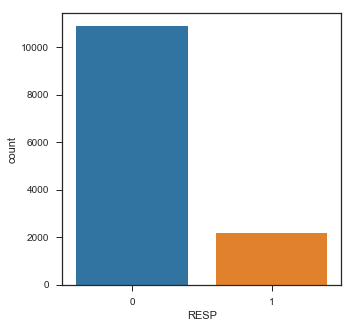

In [9]:
#Bar plot of response shows highly imbalanced
fig, ax = plt.subplots(figsize = (5,5))
sns.countplot(x = response, data = train, ax = ax)
ax.set_title = 'Counts of Response'

In [10]:
#Check variables correlations greater than 10%
pd.set_option('display.max_rows',50)
abs_correl = (abs(train.corr().round(3)[response])).sort_values(ascending=False)
top_correl = abs_correl[abs_correl>=.10]
print('Number of predictors above .10:',len(top_correl))
top_correl

Number of predictors above .10: 26


RESP            1.000
FRE             0.409
CLASSES         0.372
RESPONDED       0.350
MON             0.329
RESPONSERATE    0.327
SMONSPEND       0.314
COUPONS         0.306
LTFREDAY        0.305
STORES          0.294
TMONSPEND       0.269
REC             0.259
CCSPEND         0.257
CC_CARD         0.233
FREDAYS         0.232
HI              0.232
PROMOS          0.227
MAILED          0.204
OMONSPEND       0.195
PSSPEND         0.194
DAYS            0.176
PREVPD          0.168
WEB             0.157
AXSPEND         0.117
VALPHON         0.107
MARKDOWN        0.104
Name: RESP, dtype: float64

In [11]:
predictors = list(top_correl.index)[1:]
print(predictors)

['FRE', 'CLASSES', 'RESPONDED', 'MON', 'RESPONSERATE', 'SMONSPEND', 'COUPONS', 'LTFREDAY', 'STORES', 'TMONSPEND', 'REC', 'CCSPEND', 'CC_CARD', 'FREDAYS', 'HI', 'PROMOS', 'MAILED', 'OMONSPEND', 'PSSPEND', 'DAYS', 'PREVPD', 'WEB', 'AXSPEND', 'VALPHON', 'MARKDOWN']


In [12]:
continuous = list(train[predictors].select_dtypes(['float64']).columns)
binary = ['CC_CARD','WEB','VALPHON']
discrete = list(train[predictors].select_dtypes(['int64']).columns)
discrete.remove('CC_CARD')
discrete.remove('WEB')
discrete.remove('VALPHON')
print(continuous)
print(binary)
print(discrete)

['MON', 'RESPONSERATE', 'SMONSPEND', 'LTFREDAY', 'TMONSPEND', 'CCSPEND', 'FREDAYS', 'HI', 'OMONSPEND', 'PSSPEND', 'PREVPD', 'AXSPEND', 'MARKDOWN']
['CC_CARD', 'WEB', 'VALPHON']
['FRE', 'CLASSES', 'RESPONDED', 'COUPONS', 'STORES', 'REC', 'PROMOS', 'MAILED', 'DAYS']


#### Analysis of Continuous Variables

In [13]:
#Print non zero values of cont. variables
print('The number of non-zero value for each continuous varible')
for i in continuous:
    count = 0
    for m in train[i]:
        if m != 0:
            count += 1
    print('{}:{}'.format(i,count))

The number of non-zero value for each continuous varible
MON:13044
RESPONSERATE:6053
SMONSPEND:9194
LTFREDAY:13044
TMONSPEND:5968
CCSPEND:13044
FREDAYS:13044
HI:13044
OMONSPEND:2776
PSSPEND:5812
PREVPD:3128
AXSPEND:1732
MARKDOWN:11421


In [14]:
#Summary table of cont. variables
table_1=train[continuous].describe()
table_1.loc['skewness']= train[continuous].skew()
table_1.loc['kurtosis']= train[continuous].kurt()
table_1.round(3)

,MON,RESPONSERATE,SMONSPEND,LTFREDAY,TMONSPEND,CCSPEND,FREDAYS,HI,OMONSPEND,PSSPEND,PREVPD,AXSPEND,MARKDOWN
count,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000
mean,477.713,17.432,225.995,79.861,90.284,289.490,170.409,37.680,32.765,150.238,41.661,23.586,0.188
std,625.592,24.629,354.770,79.022,180.894,418.056,146.291,28.170,98.703,396.518,107.486,107.930,0.129
min,0.990,0.000,0.000,0.090,0.000,0.010,1.000,0.610,0.000,0.000,0.000,0.000,0.000
25%,138.475,0.000,0.000,24.557,0.000,78.000,66.660,18.307,0.000,0.000,0.000,0.000,0.090
50%,265.980,0.000,110.895,51.645,0.000,149.940,123.000,29.250,0.000,0.000,0.000,0.000,0.180
75%,579.007,30.000,295.742,105.807,109.610,323.900,229.000,49.578,0.000,128.700,0.000,0.000,0.280
max,14205.420,100.000,6418.220,364.000,3219.090,6714.330,713.000,200.000,1968.000,11476.800,2259.500,2442.350,0.910
skewness,5.295,1.517,4.367,1.695,4.218,4.414,1.607,1.803,5.446,8.597,4.549,9.312,0.305
kurtosis,59.467,1.748,36.599,2.448,30.867,30.943,2.421,4.436,47.929,150.511,36.129,124.644,-0.538


In [15]:
#Summary of AVRG over whole data since we will use for calculating cost
print(data['AVRG'].describe())
print('Skew:',data['AVRG'].skew())
print('Kurtosis:',data['AVRG'].kurt())

count    21740.000000
mean       113.889105
std         87.249794
min          0.490000
25%         60.990000
50%         92.070000
75%        139.505000
max       1919.880000
Name: AVRG, dtype: float64
Skew: 3.51171168212
Kurtosis: 28.5549076207


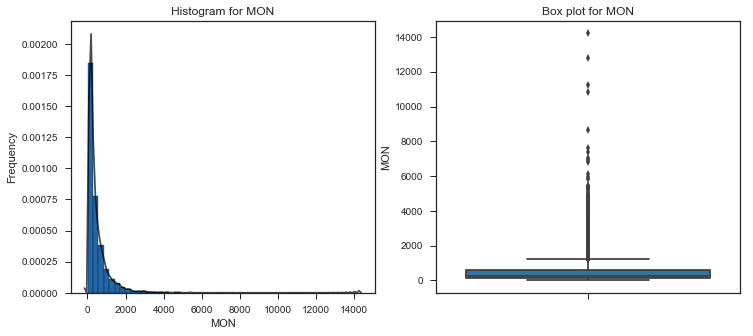

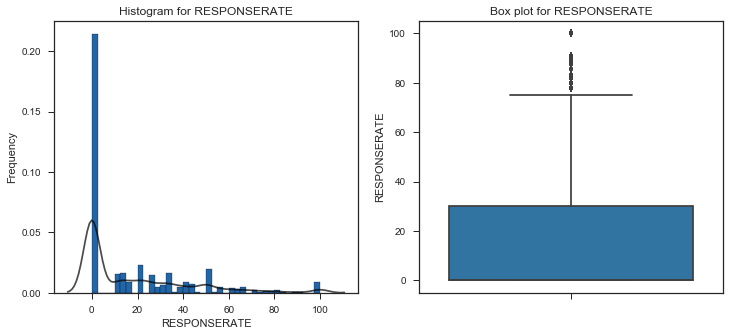

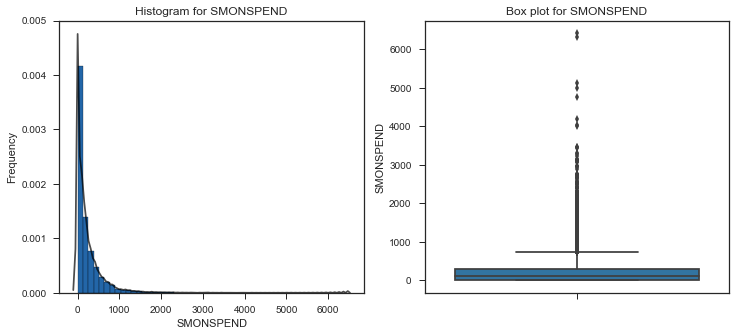

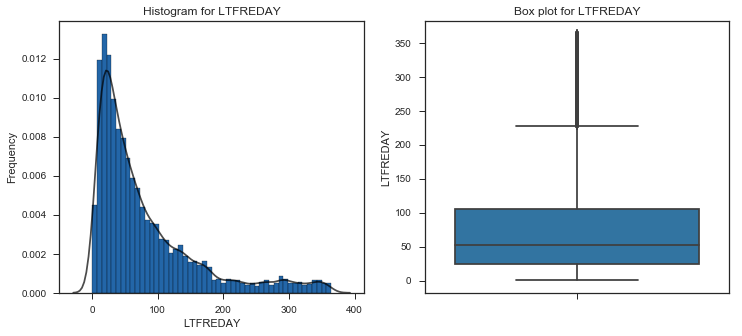

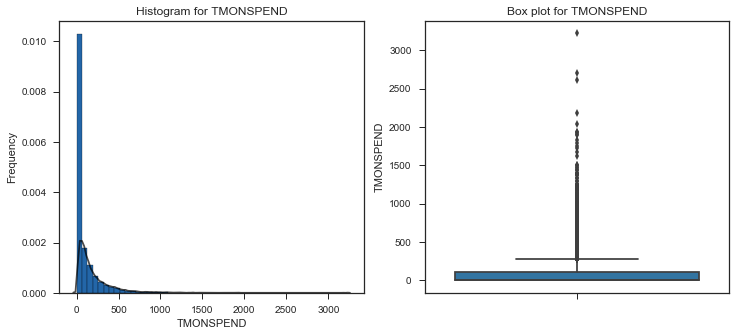

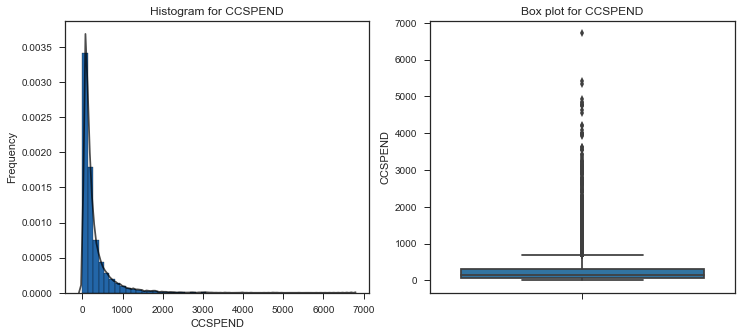

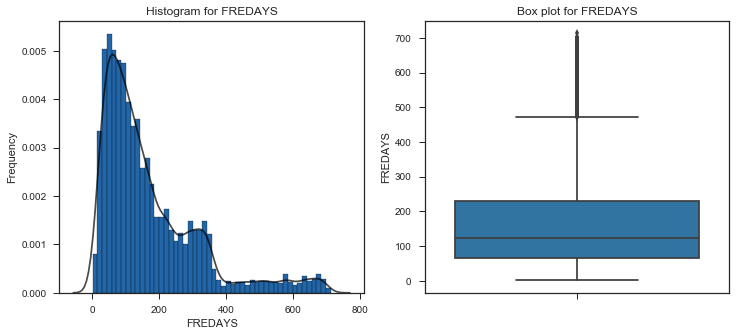

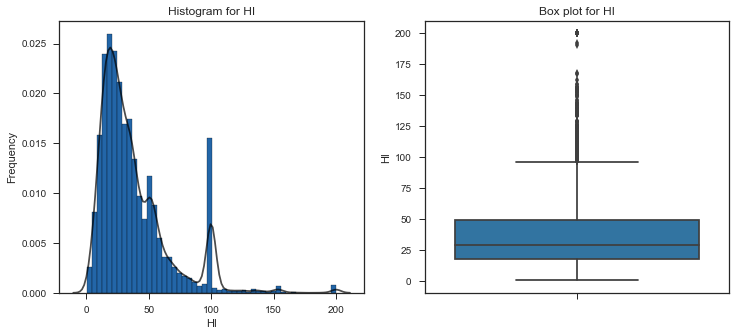

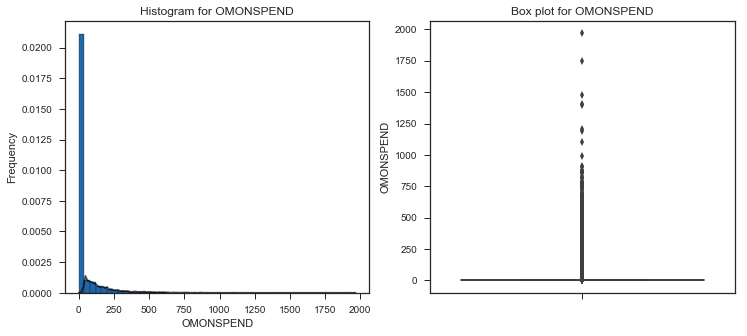

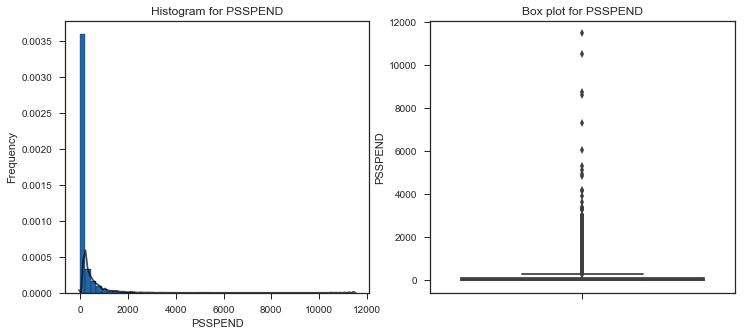

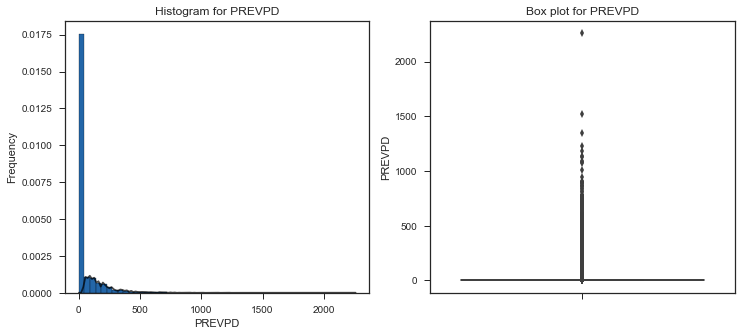

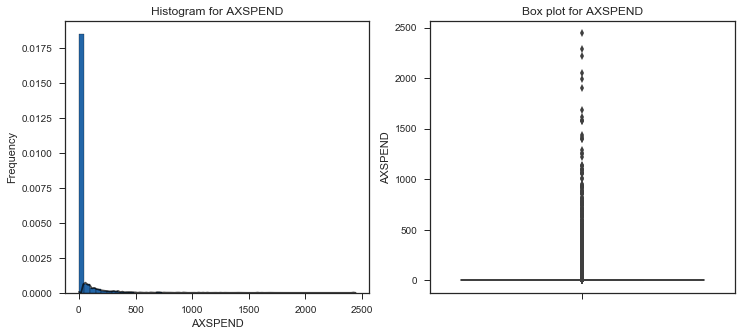

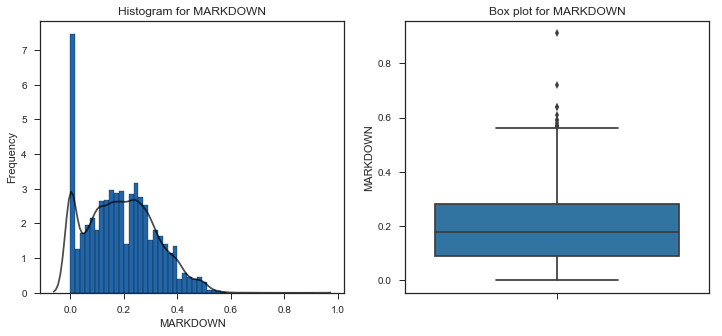

In [16]:
#Cont. predictor univariate plots
for i in continuous:
    fig,ax=plt.subplots(1,2,figsize=(12,5))
    sns.distplot(train[i],ax=ax[0],hist_kws={'alpha': 0.9, 'edgecolor':'black', 'color': sns.color_palette('Blues')[-1]}, 
                 kde_kws={'color': 'black', 'alpha': 0.7})
    ax[0].set(ylabel='Frequency', title='Histogram for {}'.format(i), xlabel=i)
    sns.boxplot(train[i],orient='v',ax=ax[1])
    ax[1].set(title='Box plot for {}'.format(i), ylabel=i)
    plt.show()

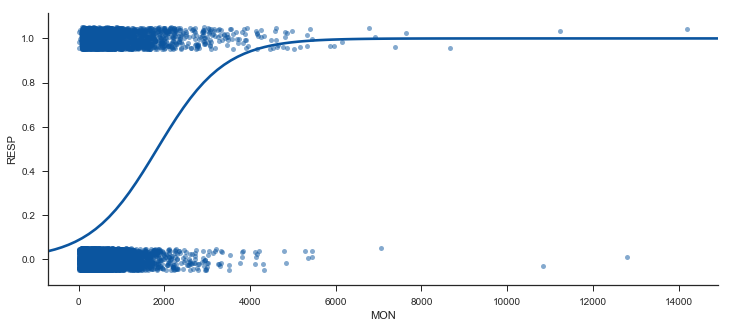

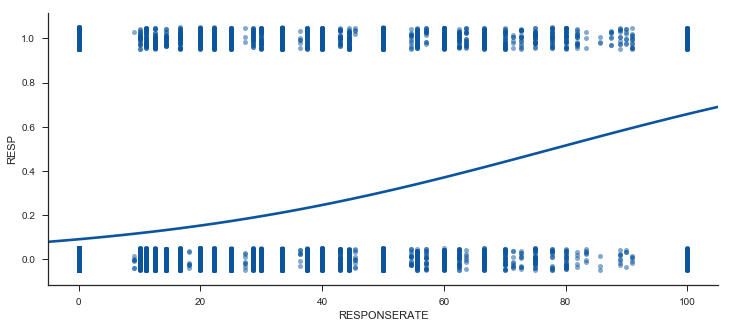

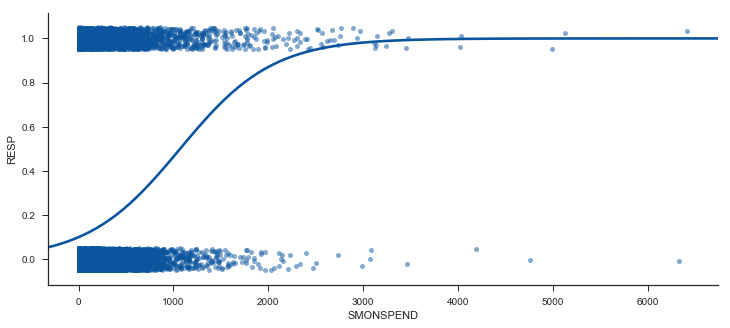

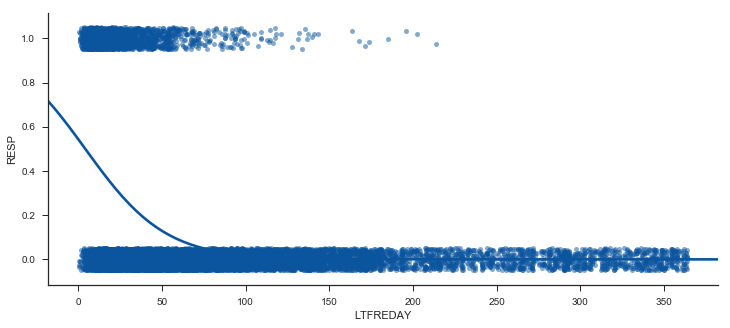

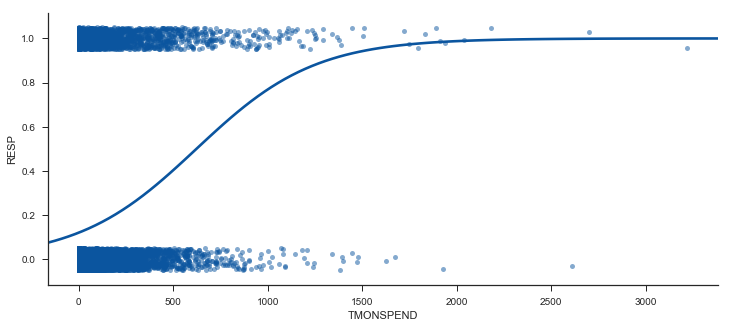

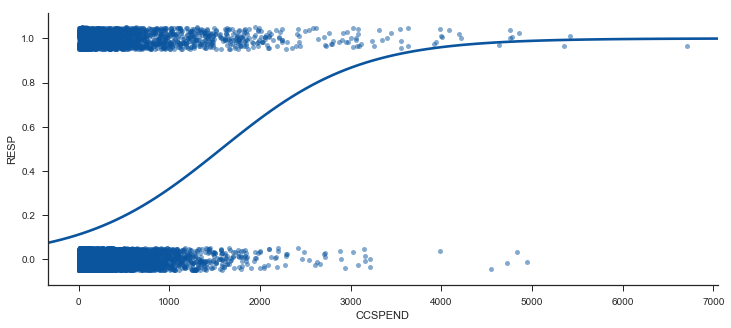

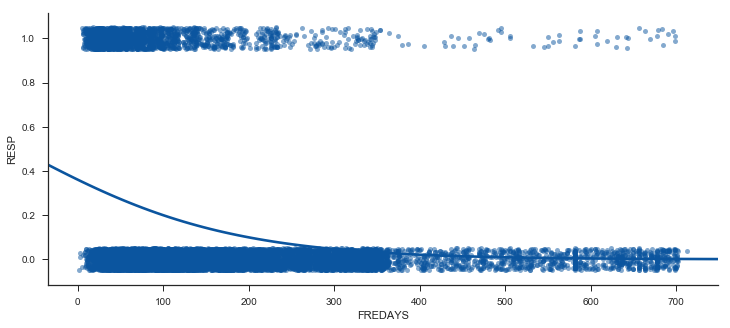

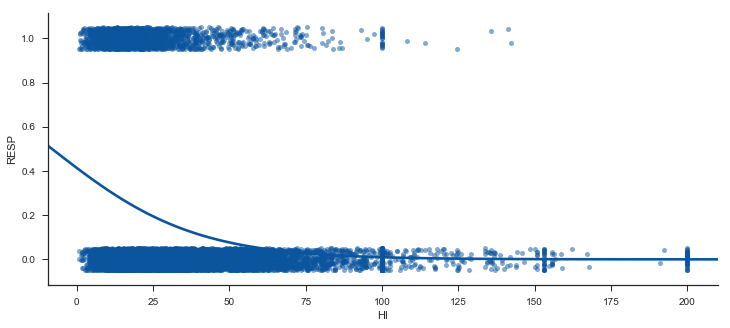

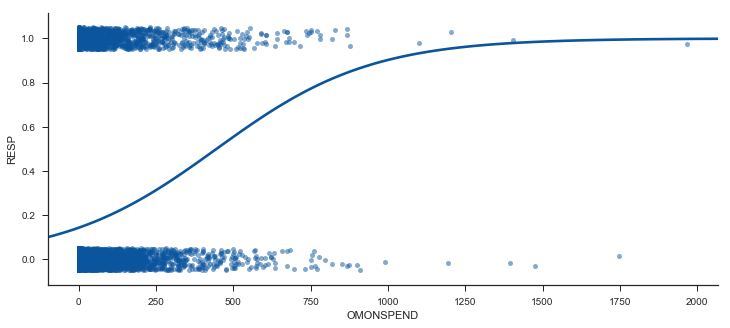

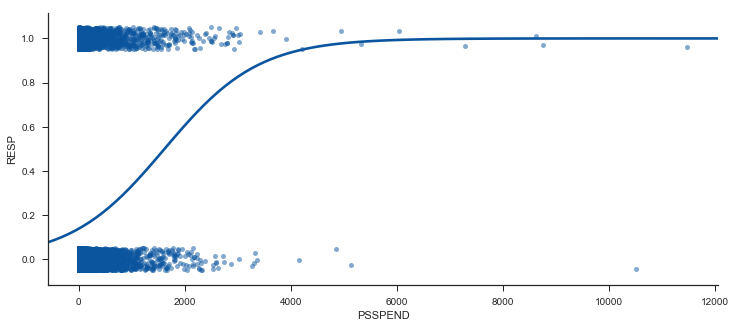

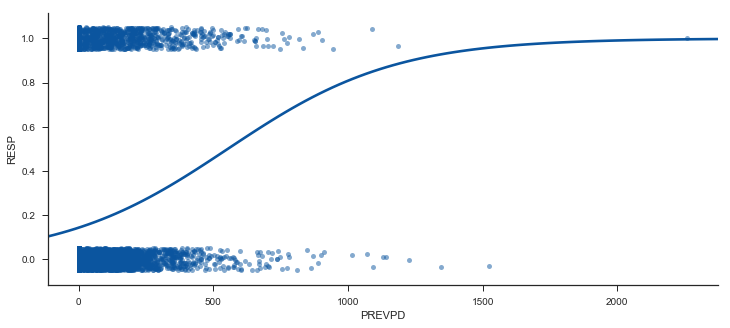

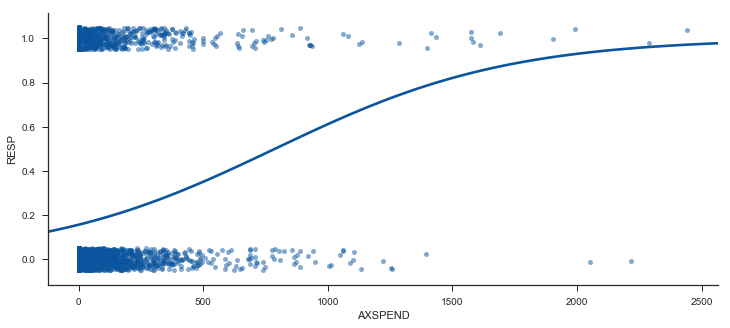

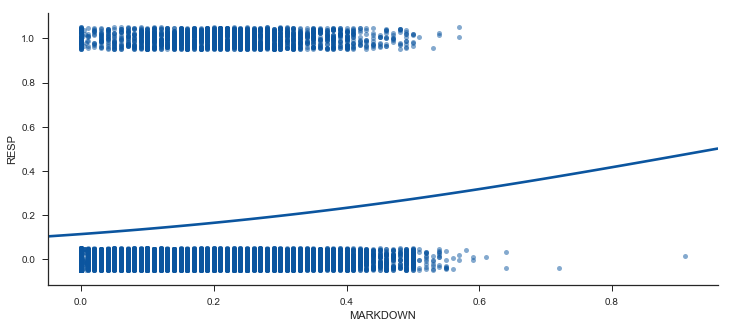

In [17]:
#Cont predictor reg plots
for i in continuous:
    fig,ax=plt.subplots(1,1,figsize=(12,5))
    sns.regplot(train[i], train[response], color=sns.color_palette('Blues')[-1], ci=None, logistic=True, y_jitter=0.05, 
            scatter_kws={'s': 25, 'color': sns.color_palette('Blues')[-1], 'alpha': .5})
    sns.despine()

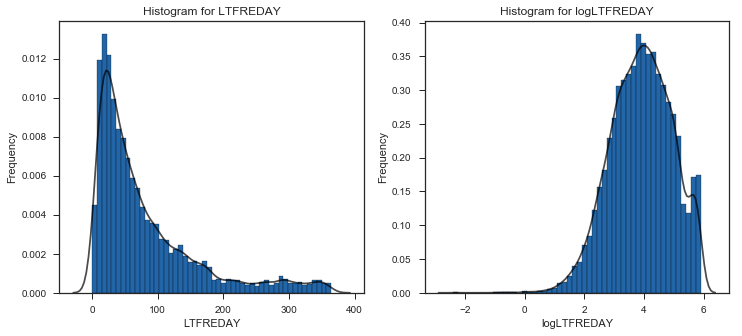

In [18]:
#Compare vairable vs log variable
import warnings
warnings.filterwarnings('ignore')

train['logLTFREDAY']=np.log(train['LTFREDAY'])

fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.distplot(train['LTFREDAY'],ax=ax[0],hist_kws={'alpha': 0.9, 'edgecolor':'black', 'color': sns.color_palette('Blues')[-1]}, kde_kws={'color': 'black', 'alpha': 0.7})
ax[0].set(ylabel='Frequency', title='Histogram for LTFREDAY', xlabel= 'LTFREDAY')
sns.distplot(train['logLTFREDAY'],ax=ax[1],hist_kws={'alpha': 0.9, 'edgecolor':'black', 'color': sns.color_palette('Blues')[-1]}, kde_kws={'color': 'black', 'alpha': 0.7})
ax[1].set(ylabel='Frequency', title='Histogram for logLTFREDAY', xlabel= 'logLTFREDAY')
plt.show()

In [19]:
#Transform variables
log_trans_cont = ['MON','LTFREDAY','CCSPEND','FREDAYS','HI']
sqrt_trans_cont = ['RESPONSERATE','SMONSPEND','TMONSPEND','OMONSPEND','PSSPEND','PREVPD','AXSPEND']

for i in log_trans_cont:
    train[i] = np.log(train[i])
    validate[i] = np.log(validate[i])
    test[i] = np.log(test[i])

for j in sqrt_trans_cont:
    train[j] = np.sqrt(train[j])
    validate[j] = np.sqrt(validate[j])
    test[j] = np.sqrt(test[j])

#### Analysis of Discrete Variables

In [20]:
#Number of non zero discrete vars
print('the number of non-zero value for each discrete varible')
for i in discrete:
    count = 0
    for m in train[i]:
        if m != 0:
            count += 1
    print('{}:{}'.format(i,count))

the number of non-zero value for each discrete varible
FRE:13044
CLASSES:13044
RESPONDED:6053
COUPONS:4254
STORES:13044
REC:13044
PROMOS:12547
MAILED:10994
DAYS:13044


In [21]:
#Summary table discrete vars
table_2=train[discrete].describe()
table_2.loc['skewness']= train[discrete].skew()
table_2.loc['kurtosis']= train[discrete].kurt()
table_2.round(3)

,FRE,CLASSES,RESPONDED,COUPONS,STORES,REC,PROMOS,MAILED,DAYS
count,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000,13044.000
mean,5.114,7.196,1.201,0.753,2.355,126.520,11.624,4.693,438.549
std,6.451,5.352,1.833,1.655,1.620,104.561,7.124,3.545,192.316
min,1.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000
25%,1.000,3.000,0.000,0.000,1.000,34.000,5.000,1.000,287.750
50%,3.000,6.000,0.000,0.000,2.000,99.000,12.000,4.000,446.000
75%,6.000,10.000,2.000,1.000,3.000,204.000,17.000,8.000,630.000
max,115.000,35.000,11.000,21.000,19.000,364.000,36.000,11.000,713.000
skewness,4.088,1.287,1.952,4.009,2.241,0.662,0.146,0.140,-0.246
kurtosis,28.668,1.553,3.915,23.371,8.392,-0.793,-0.914,-1.412,-1.153


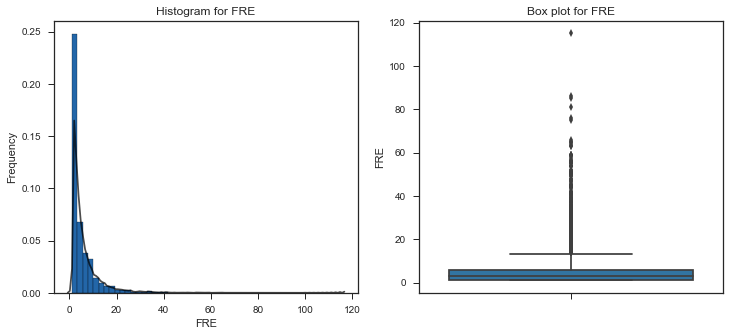

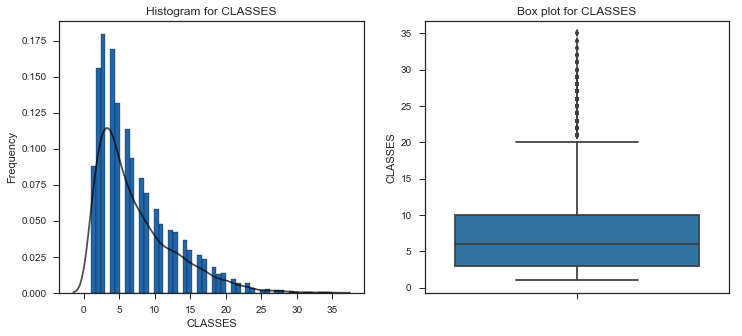

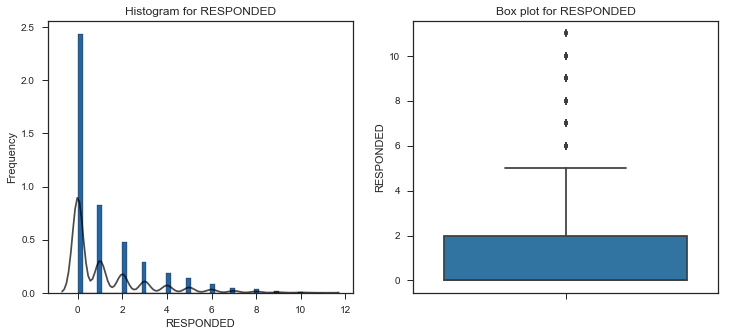

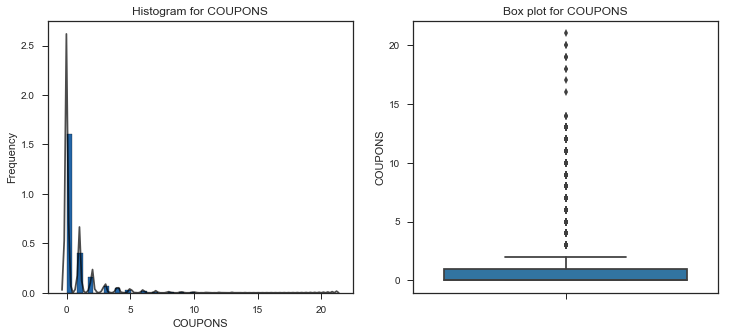

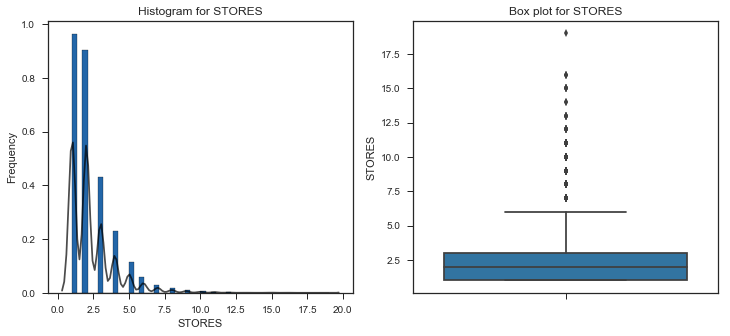

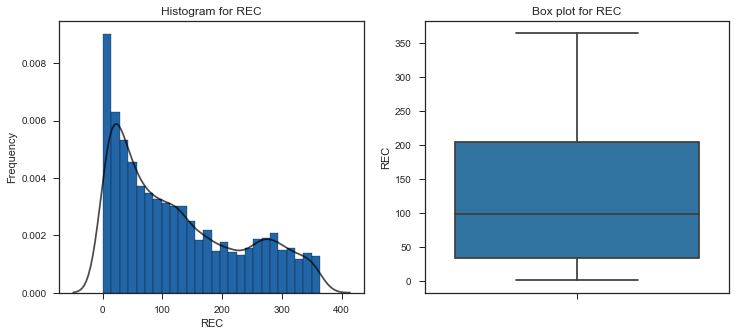

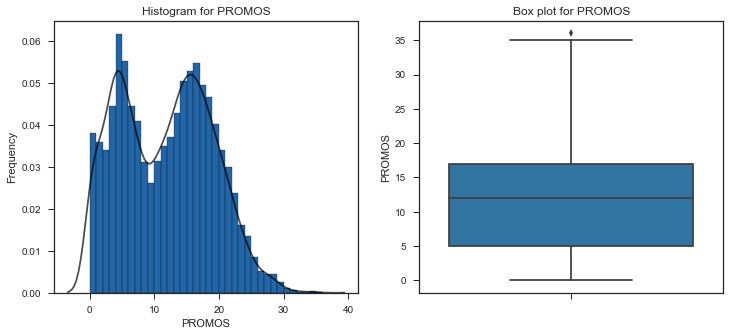

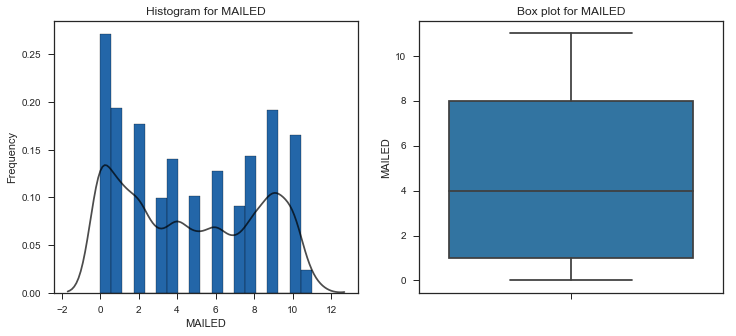

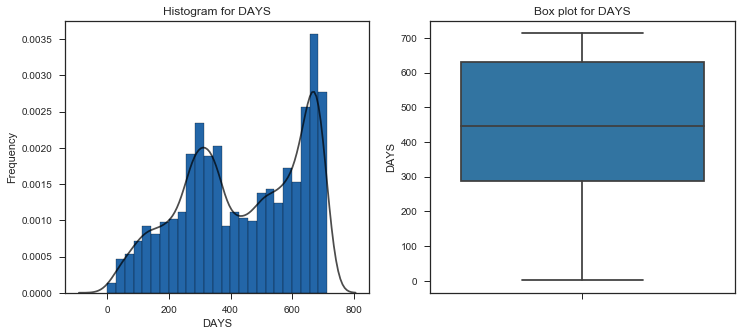

In [22]:
#Univariate plots of discrete vars
for i in discrete:
    fig,ax=plt.subplots(1,2,figsize=(12,5))
    sns.distplot(train[i],ax=ax[0],hist_kws={'alpha': 0.9, 'edgecolor':'black', 'color': sns.color_palette('Blues')[-1]}, 
                 kde_kws={'color': 'black', 'alpha': 0.7})
    ax[0].set(ylabel='Frequency', title='Histogram for {}'.format(i), xlabel=i)
    sns.boxplot(train[i],orient='v',ax=ax[1])
    ax[1].set(title='Box plot for {}'.format(i), ylabel=i)

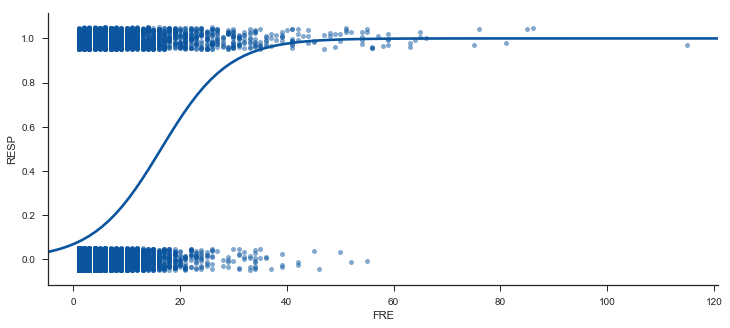

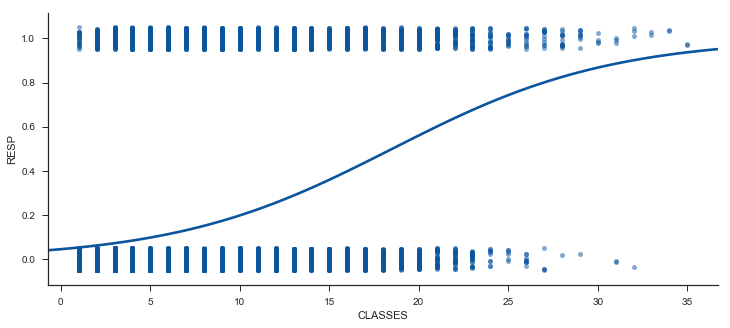

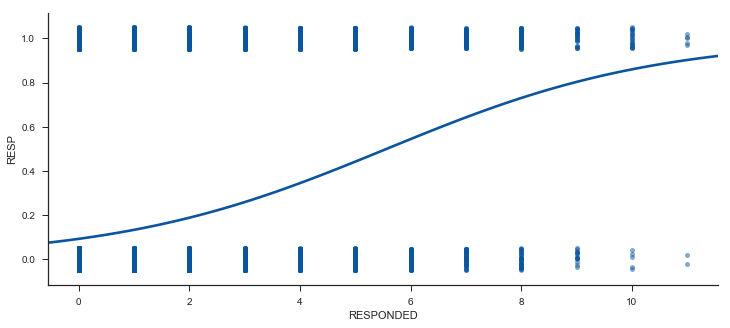

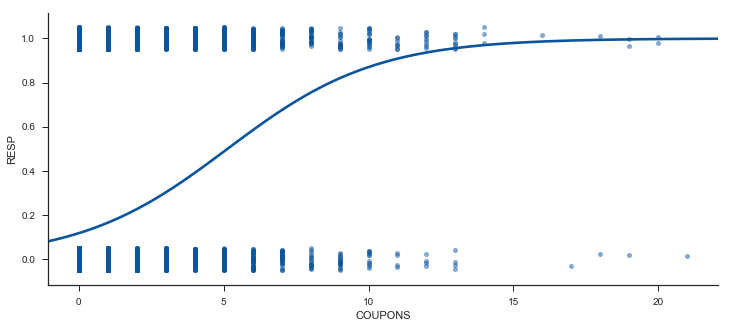

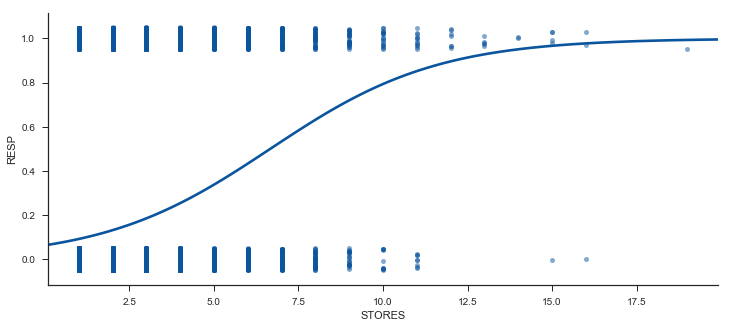

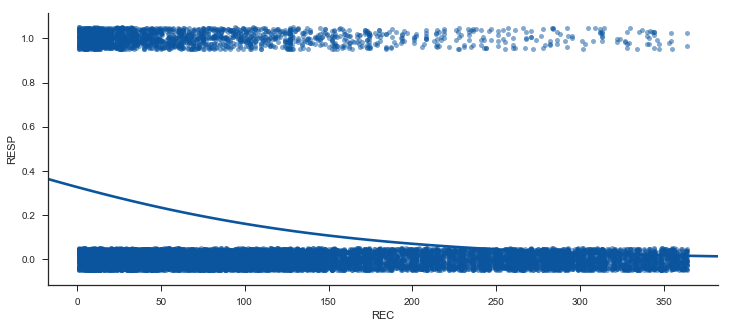

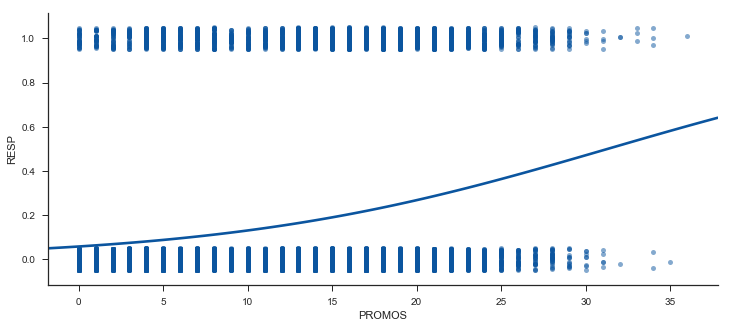

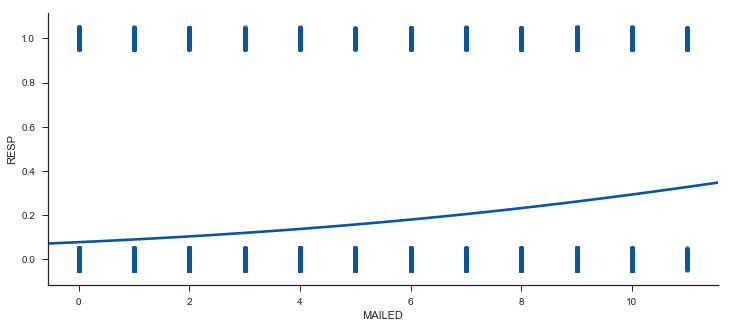

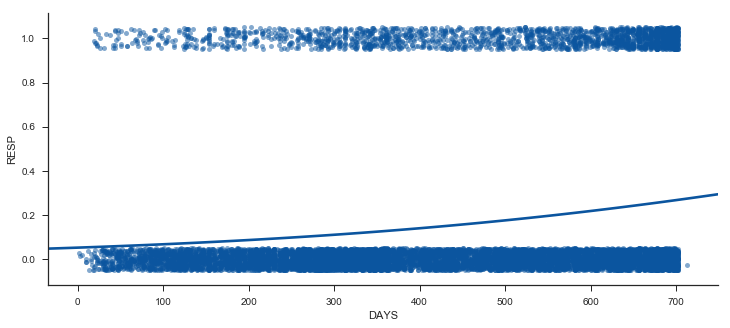

In [23]:
#Reg plots of discrete vars
for i in discrete:
    fig,ax=plt.subplots(1,1,figsize=(12,5))
    sns.regplot(train[i], train[response], color=sns.color_palette('Blues')[-1], ci=None, logistic=True, y_jitter=0.05, 
            scatter_kws={'s': 25, 'color': sns.color_palette('Blues')[-1], 'alpha': .5})
    sns.despine()

#### Analysis of Binary Variables

In [24]:
#Percentage breakdowns of binary vars
for i in binary:
    table=pd.crosstab(train[response], train[i])
    table = (table/table.sum()).round(3)
    print(table)
    print('----------------------------------------------')

CC_CARD      0      1
RESP                 
0        0.904  0.726
1        0.096  0.274
----------------------------------------------
WEB       0      1
RESP              
0     0.847  0.559
1     0.153  0.441
----------------------------------------------
VALPHON      0      1
RESP                 
0        0.934  0.819
1        0.066  0.181
----------------------------------------------


#### Analysis of Cluster Type

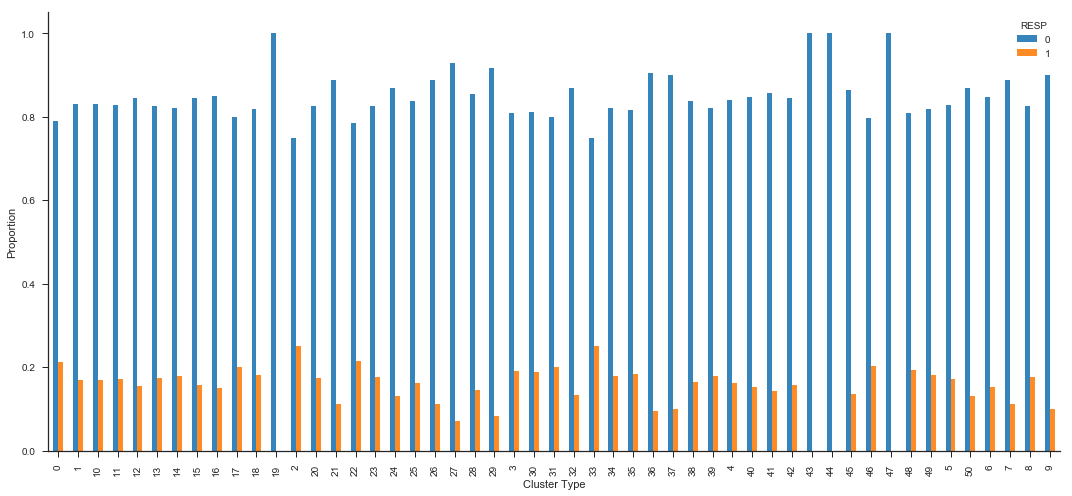

In [25]:
#Graphing proportion comparisons of lifestyle cluster types
cluster = pd.crosstab(train[response],train['CLUSTYPE'])
cluster_freq = (cluster/cluster.sum()).round(3)

colours=['#1F77B4', '#FF7F0E']

fig, ax = plt.subplots(figsize=(15,7))
(cluster_freq.T).plot(kind='bar', alpha=0.9, color=colours, ax=ax)
ax.set_xlabel('Cluster Type')
ax.set_ylabel('Proportion')
plt.tight_layout()
sns.despine()
plt.show()

In [26]:
cluster_freq

CLUSTYPE,0,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,24,25,26,27,28,29,3,30,31,32,33,34,35,36,37,38,39,4,40,41,42,43,44,45,46,47,48,49,5,50,6,7,8,9
RESP,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.789,0.831,0.831,0.828,0.846,0.826,0.822,0.844,0.85,0.8,0.819,1.0,0.75,0.826,0.889,0.785,0.825,0.869,0.838,0.889,0.929,0.855,0.917,0.81,0.812,0.8,0.868,0.75,0.821,0.816,0.905,0.9,0.837,0.821,0.839,0.847,0.857,0.844,1.0,1.0,0.865,0.798,1.0,0.808,0.818,0.829,0.869,0.848,0.888,0.825,0.9
1,0.211,0.169,0.169,0.172,0.154,0.174,0.178,0.156,0.15,0.2,0.181,0.0,0.25,0.174,0.111,0.215,0.175,0.131,0.162,0.111,0.071,0.145,0.083,0.19,0.188,0.2,0.132,0.25,0.179,0.184,0.095,0.1,0.163,0.179,0.161,0.153,0.143,0.156,0.0,0.0,0.135,0.202,0.0,0.192,0.182,0.171,0.131,0.152,0.112,0.175,0.1


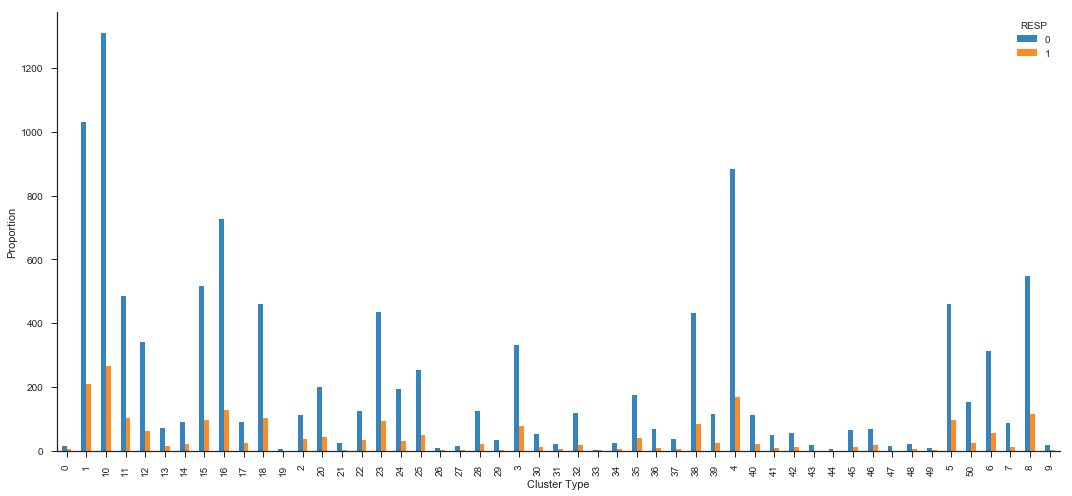

In [27]:
#Cluster types count breakdown
cluster = pd.crosstab(train[response],train['CLUSTYPE'])

colours=['#1F77B4', '#FF7F0E']

fig, ax = plt.subplots(figsize=(15,7))
(cluster.T).plot(kind='bar', alpha=0.9, color=colours, ax=ax)
ax.set_xlabel('Cluster Type')
ax.set_ylabel('Proportion')
plt.tight_layout()
sns.despine()
plt.show()


There are a lot of classes here, and there isn't really a significant difference between groups

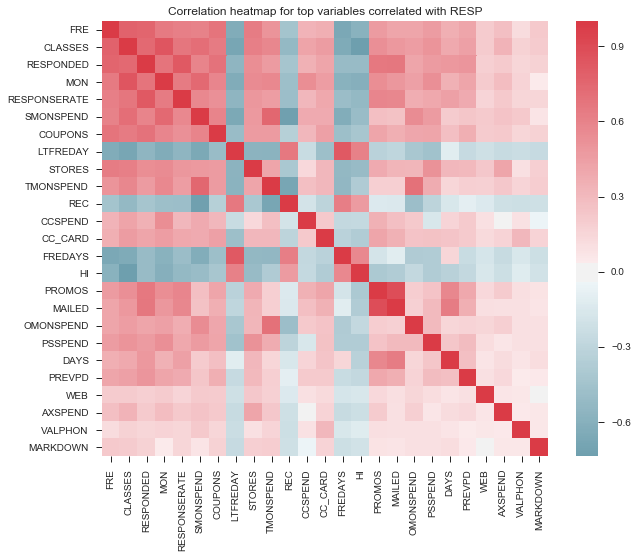

In [28]:
#Heatmap of predictors
train[predictors].corr().round(4)
fig, ax = plt.subplots(figsize = (10,8))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(train[predictors].corr(), ax=ax, cmap=cmap,center = 0)
ax.set(title='Correlation heatmap for top variables correlated with RESP')

#### Create New Variables

In [29]:
#Create new variables based on amount spent last one month, the two months before that, and the three months before that
train['TOMONSPEND']=train['TMONSPEND']-train['OMONSPEND']
train['STMONSPEND']=train['SMONSPEND']-train['TMONSPEND']
validate['TOMONSPEND']=validate['TMONSPEND']-validate['OMONSPEND']
validate['STMONSPEND']=validate['SMONSPEND']-validate['TMONSPEND']
test['TOMONSPEND']=test['TMONSPEND']-test['OMONSPEND']
test['STMONSPEND']=test['SMONSPEND']-test['TMONSPEND']

In [30]:
#Append and remove predictors accordingly
predictors.append('TOMONSPEND')
predictors.append('STMONSPEND')
predictors.remove('TMONSPEND')
predictors.remove('SMONSPEND')

In [31]:
#Create PCA based on correlations, but not used in final model.
PCA_1=['CLASSES','HI']

PCA_2=['FREDAYS','LTFREDAY']

PCA_3=['RESPONDED','RESPONSERATE']
       
PCA_4=['MAILED','PROMOS']

#### Standardize Data

In [32]:
#Standardize data
mu = train[predictors].mean()
sigma = train[predictors].std()

train[predictors] = (train[predictors] - mu)/sigma
validate[predictors] = (validate[predictors] - mu)/sigma
test[predictors] = (test[predictors] - mu)/sigma

In [33]:
train[predictors].head()

,FRE,CLASSES,RESPONDED,MON,RESPONSERATE,COUPONS,LTFREDAY,STORES,REC,CCSPEND,CC_CARD,FREDAYS,HI,PROMOS,MAILED,OMONSPEND,PSSPEND,DAYS,PREVPD,WEB,AXSPEND,VALPHON,MARKDOWN,TOMONSPEND,STMONSPEND
2315,-0.482712,-0.036641,-0.655337,-1.261440,-0.855025,-0.454749,0.483680,0.398151,0.138487,-0.604278,1.252037,0.357262,0.700459,-0.929851,-1.323881,-0.450866,-0.329843,-0.574829,0.573086,-0.210798,-0.330145,0.399188,-1.455073,-0.616235,0.206835
6380,-0.482712,-1.157687,-0.655337,-1.099517,-0.855025,-0.454749,1.196059,-0.836335,1.467854,-0.345763,-0.798637,0.398343,1.695595,-0.087580,-0.477514,-0.450866,-0.669692,-0.512431,-0.502929,-0.210798,-0.330145,0.399188,0.557872,-0.616235,-0.822825
15341,-0.017694,-0.597164,-0.655337,0.826934,-0.855025,-0.454749,-0.623716,-0.836335,0.157614,1.221956,-0.798637,-0.938500,0.653649,-0.929851,-1.041759,-0.450866,-0.669692,-0.907614,-0.502929,-0.210798,-0.330145,0.399188,-0.913126,-0.616235,2.245112
21727,0.292318,-0.223482,-0.109822,0.425451,1.373188,-0.454749,-0.820695,0.398151,-0.684000,-1.809081,-0.798637,-1.345049,0.381406,-0.929851,-0.759636,-0.450866,1.345451,-0.933613,-0.502929,-0.210798,-0.330145,0.399188,-0.138917,0.286830,0.779547
6011,3.857455,2.579134,2.072236,1.951845,1.373188,4.982781,-2.118080,5.336097,-1.114370,0.914543,1.252037,-1.875748,-1.868347,1.316203,1.497342,2.505279,3.105528,1.349088,0.425937,-0.210798,-0.330145,0.399188,0.093346,0.294784,0.656014
